Map the position of the flux

# Imports

In [1]:
import cmocean.cm as cm
import glob
from matplotlib.colors import LogNorm, Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import scipy.interpolate as interp

#from salishsea_tools import nc_tools

%matplotlib inline

# Get Grid Info Data

In [2]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdepw_1d)
figrid = 386
igrid = figrid-1
fmask = mymesh.fmask[0, :, igrid]
tmask = mymesh.tmask[0]
nav_lon = mymesh.nav_lon[igrid]
u_lons = mymesh.glamv[0, igrid]    # note switch to v with the switch from t to f
f_lons = mymesh.glamf[0, igrid]
w_depths = mymesh.gdepw_1d

# Twelve Hours : 01sep15

In [8]:
file = '/data/sallen/results/Ariane/BackNorth/01apr15/ariane_positions_quantitative.nc'
tidefile = '/results/SalishSea/nowcast-green.201812/01apr15/PointAtkinson.nc'

In [9]:
def get_data(mydata, section, time):
    lons = mydata.init_lon[(mydata.final_section==section) & (mydata.init_t==time)]
    depths = depthf(mydata.init_z[(mydata.final_section==section) & (mydata.init_t==time)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section) & (mydata.init_t==time)]
    return lons, depths, transports

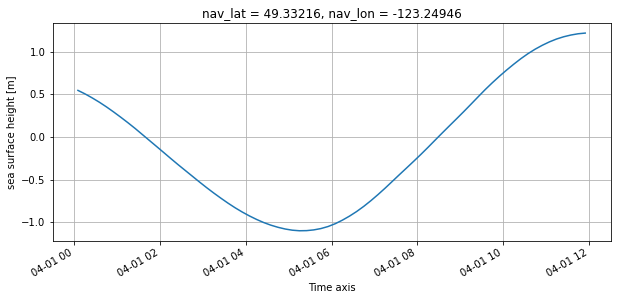

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
with xr.open_dataset(tidefile) as tidedata:
    tidedata.sossheig[0:72].plot(ax=ax)
ax.grid(which='both')

<ipython-input-11-2896aa873d93>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(x, y, fmask, cmap='Greys_r')
<ipython-input-11-2896aa873d93>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(x, y, fmask, cmap='Greys_r')
<ipython-input-11-2896aa873d93>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or

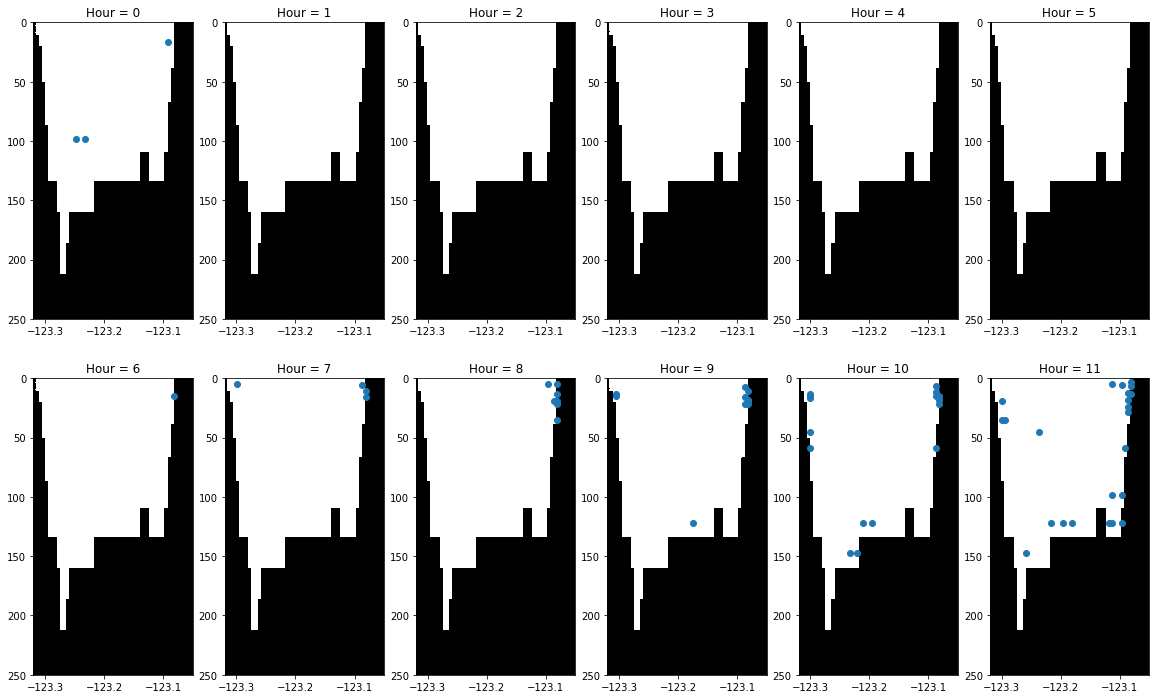

In [11]:
mydata = xr.open_dataset(file)
section = 2
time1 = mydata.init_t[0]
fig, axs = plt.subplots(2, 6, figsize=(20, 12))
x, y = np.meshgrid(u_lons, w_depths)
for hour in range(12):
    ax = axs[int(hour/6), hour-6*int(hour/6)]
    lons, depths, transports = get_data(mydata, section, time1+hour)
    ax.pcolormesh(x, y, fmask, cmap='Greys_r')
    ax.plot(lons, depths, 'o')
    ax.invert_yaxis()
    ax.set_xlim((-123.32, -123.05))
    ax.set_ylim((250, 0))
    ax.set_title("Hour = "+str(hour))

# Fifteen Days 01apr15-15apr15

In [12]:
sevendays = (sorted(glob.glob('/data/sallen/results/Ariane/BackNorth/0*apr15/ariane_positions_quantitative.nc')) +
            sorted(glob.glob('/data/sallen/results/Ariane/BackNorth/1[012345]apr15/ariane_positions_quantitative.nc')))
tidefile = (sorted(glob.glob('/results/SalishSea/nowcast-green/0*apr15/PointAtkinson.nc')) +
            sorted(glob.glob('/results/SalishSea/nowcast-green/1[012345]apr15/PointAtkinson.nc')))
salfile = (sorted(glob.glob('/results/SalishSea/nowcast-green/0*apr15/SalishSea_1d_2015040*_2015040*_grid_T.nc')) +
           sorted(glob.glob('/results/SalishSea/nowcast-green/1[012345]apr15/SalishSea_1d_2015041[012345]_2015041[012345]_grid_T.nc')))

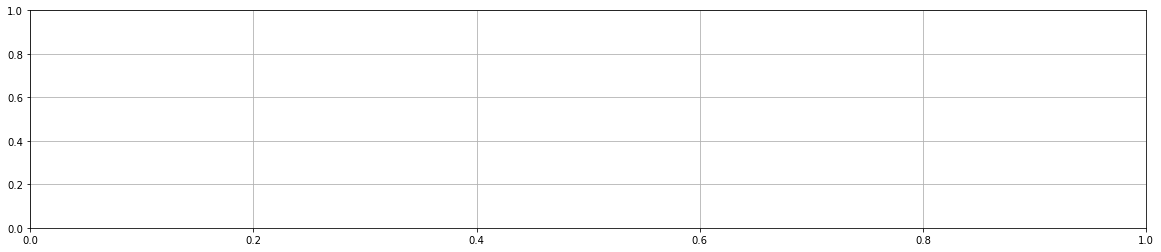

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
for file in tidefile:
    with xr.open_dataset(file) as tidedata:
        tidedata.sossheig.plot(ax=ax, color='b')
ax.grid(which='both')

In [14]:
def draw_patches(fmask, ll, ul, u_lons, w_depths):
    topo = []
    for i in range(ll,ul):
        for j in range(39):
            if fmask[j, i] == 0:
                rect = Rectangle((u_lons[i], w_depths[j]), u_lons[i+1]-u_lons[i], w_depths[j+1]-w_depths[j])
                topo.append(rect)
    pc = PatchCollection(topo, facecolors='burlywood', edgecolors='burlywood')
    return(pc)

0 294515.4694934004


AttributeError: 'QuadMesh' object has no property 'normed'

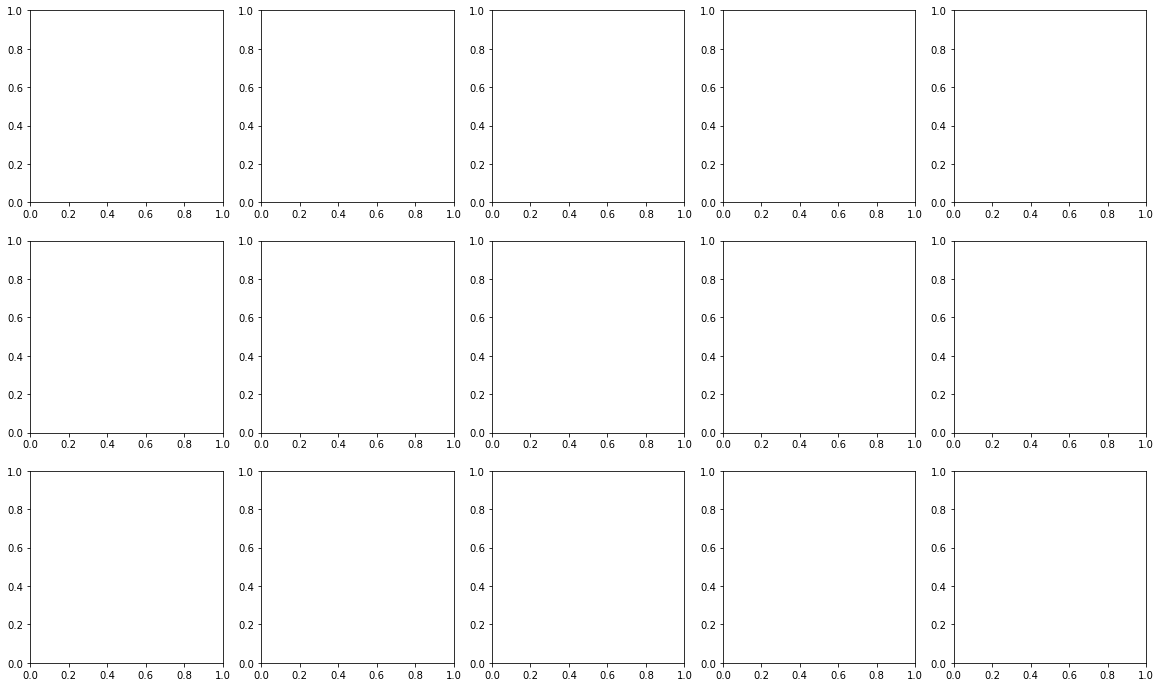

In [15]:
section = 2
m2lon = ((u_lons[314]-u_lons[260])/(mymesh.e2f[0, igrid, 260:314].sum()))
tmax = 1378670
vvmax = 0.15/float(m2lon)*24/tmax
xs, ys = np.meshgrid(np.array(mymesh.glamv[0, igrid]), np.array(mymesh.gdept_1d))
fig, axs = plt.subplots(3, 5, figsize=(20, 12))
for day, f in enumerate(sevendays):
    ax = axs[int(day/5), day-5*int(day/5)]
    mydata = xr.open_dataset(f)
    lons = mydata.init_lon[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    print (day, float(transports.sum()))
    vmax = vvmax*tmax/float(transports.sum())
    c, xedge, yedge, im = ax.hist2d(lons, 
                                depths,
                                weights=transports,
                                bins=[np.array(f_lons[260:314]), w_depths[0]], cmap=cm.amp, 
                                    normed=True, vmax=vmax)
    pc = draw_patches(fmask, 260, 314, np.array(u_lons), np.array(w_depths[0]))
    ax.add_collection(pc)
    cb1 = fig.colorbar(im, ax=ax) 
    cb1.set_ticks([0, vmax])
    cb1.set_ticklabels([0, f'{vmax * float(m2lon) * float(transports.sum())/24.:.2f}'])
    cb1.set_label('m s$^{-1}$', labelpad=-20)
    salinity = 0.5*(np.ma.array(xr.open_dataset(salfile[day]).vosaline[0, :, igrid],
                       mask=1-tmask[:, igrid]) +
                    np.ma.array(xr.open_dataset(salfile[day]).vosaline[0, :, igrid+1],
                       mask=1-tmask[:, igrid+1]))
    CS = ax.contour(xs, ys, salinity,  [29, 30, 30.2, 30.4, 30.6, 30.8, 31, 31.2, 31.4], colors='g')
    ax.clabel(CS, inline=1, fontsize=7)
    ax.invert_yaxis()
    ax.set_xlim((-123.32, -123.05))
    ax.set_ylim((250, 0))
    ax.set_title("Day, April "+str(day+1))
    mydata.close()

In [11]:
print(mymesh.e2f[0, igrid, 260:314].sum())
print(u_lons[314] - u_lons[260])

<xarray.DataArray 'e2f' ()>
array(27069.478638769964)
<xarray.DataArray 'glamv' ()>
array(0.28084564208984375, dtype=float32)


In [12]:
print (c.shape, mymesh.e3t_1d[0,0:39].shape)
print (mymesh.gphiv[0, igrid, 260])
print (m2lon)
print (((c*np.array(mymesh.e3t_1d[0,0:39])).transpose()*np.array(mymesh.e2f[0, igrid, 260:314-1])).sum()
       *m2lon * transports.sum())

(53, 39) (39,)
<xarray.DataArray 'gphiv' ()>
array(48.877899169921875, dtype=float32)
<xarray.DataArray ()>
array(1.037499265640106e-05)
<xarray.DataArray ()>
array(231492.2767399414)


In [13]:
mt = 38704 # m3/s
tt = mt*86400 #m3
print(tt/1e6)
transports.sum()*3600/1e6

3344.0256


<xarray.DataArray 'init_transp' ()>
array(833.0925769029589)

# Month of April

In [16]:
# v3 fluxes but earlier version of monthly average salinities
amonth = glob.glob('/data/sallen/results/Ariane/BackNorth/*apr15/ariane_positions_quantitative.nc')
salinity = 0.5*(np.ma.array(xr.open_dataset('/data/sallen/results/Ariane/Salinity/SalishSea_1month_201504_grid_T.nc').vosaline[0, :, igrid],
                       mask=1-tmask[:, igrid]) +
                    np.ma.array(xr.open_dataset('/data/sallen/results/Ariane/Salinity/SalishSea_1month_201504_grid_T.nc').vosaline[0, :, igrid+1],
                       mask=1-tmask[:, igrid+1]))

In [17]:
section = 2
mydata = xr.open_dataset(amonth[0])
lons = mydata.init_lon[(mydata.final_section==section)]
depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
transports = mydata.init_transp[(mydata.final_section==section)]
for f in amonth[1:]:
    mydata = xr.open_dataset(f)
    lons = np.concatenate((lons, mydata.init_lon[(mydata.final_section==section)]))
    depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
    transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))

In [18]:
amonth = glob.glob('/data/sallen/results/Ariane/InGIslands/*apr15/ariane_positions_quantitative.nc')
section = 2
for f in amonth:
    mydata = xr.open_dataset(f)
    lons = np.concatenate((lons, mydata.init_lon[(mydata.final_section==section)]))
    depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
    transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))

In [19]:
amonth = glob.glob('/data/sallen/results/Ariane/FullNorth/*apr15/ariane_positions_quantitative.nc')
section = 2
mydata = xr.open_dataset(amonth[0])
olons = mydata.init_lon[(mydata.final_section==section)]
odepths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
otransports = mydata.init_transp[(mydata.final_section==section)]
for f in amonth[1:]:
    mydata = xr.open_dataset(f)
    olons = np.concatenate((olons, mydata.init_lon[(mydata.final_section==section)]))
    odepths = np.concatenate((odepths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
    otransports = np.concatenate((otransports, mydata.init_transp[(mydata.final_section==section)]))

In [20]:
amonth = glob.glob('/data/sallen/results/Ariane/SouthGIslands/*apr15/ariane_positions_quantitative.nc')
section = 2
for f in amonth:
    mydata = xr.open_dataset(f)
    olons = np.concatenate((olons, mydata.init_lon[(mydata.final_section==section)]))
    odepths = np.concatenate((odepths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
    otransports = np.concatenate((otransports, mydata.init_transp[(mydata.final_section==section)]))

In [21]:
walrus = olons[olons > -123.4]
myw =  walrus[walrus < -123.3]
print (myw[0:20])

[-123.31547546 -123.31547546 -123.31547546 -123.31547546 -123.31027603
 -123.31027603 -123.31027603 -123.31027603 -123.31547546 -123.31027603
 -123.31027603 -123.31027603 -123.31027603 -123.31547546 -123.3050766
 -123.31027603 -123.3050766  -123.31027603 -123.3050766  -123.3050766 ]


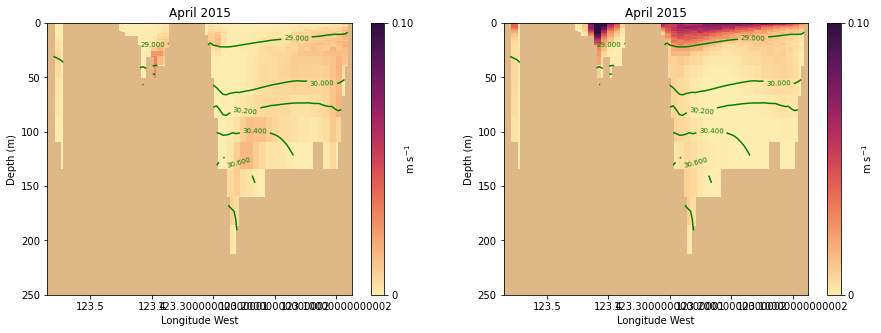

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
vmax = 0.22 / transports.sum() * 31097863.7006
v2max = 0.22 / otransports.sum() * 31097863.7006
jmin = 210
gridding = 2
c, xedge, yedge, im = axs[0].hist2d(lons, 
                                depths,
                                weights=transports,
                                bins=[np.array(f_lons[jmin:314:gridding]), w_depths[0]], cmap=cm.matter, 
                                    density=True, vmax=vmax)
yes = yedge.copy()
CS = axs[0].contour(xs, ys, salinity,  [29, 30, 30.2, 30.4, 30.6, 30.8, 31, 31.2, 31.4], colors='g')
axs[0].clabel(CS, inline=1, fontsize=7)
pc = draw_patches(fmask, jmin, 314, np.array(u_lons), np.array(w_depths[0]))
axs[0].add_collection(pc)
cb1 = fig.colorbar(im, ax=axs[0]) 
cb1.set_ticks([0, vmax])

cb1.set_label('m s$^{-1}$', labelpad=-10)
c, xedge, yedge, im = axs[1].hist2d(olons, 
                                odepths,
                                weights=otransports,
                                bins=[np.array(f_lons[jmin:314:gridding]), w_depths[0]], cmap=cm.matter, 
                                    density=True, vmax=v2max)
CS = axs[1].contour(xs, ys, salinity,  [29, 30, 30.2, 30.4, 30.6, 30.8, 31, 31.2, 31.4], colors='g')
axs[1].clabel(CS, inline=1, fontsize=7)
pc = draw_patches(fmask, jmin, 314, np.array(u_lons), np.array(w_depths[0]))
axs[1].add_collection(pc)
cb2 = fig.colorbar(im, ax=axs[1]) 
cb2.set_ticks([0, v2max])
cb2.set_label('m s$^{-1}$', labelpad=-10)
for ax in axs:
    ax.invert_yaxis()
    ax.set_xlim((-123.57, -123.075))
    ax.set_ylim((250, 0))
    ax.set_xticks(np.arange(-123.5, -123.1, 0.1))
    ax.set_xticklabels(np.arange(123.5, 123.1, -0.1))
    ax.set_xlabel('Longitude West')
    ax.set_ylabel('Depth (m)')
    ax.set_title("April 2015")
cb1.set_ticklabels([0, f'{vmax * float(m2lon) * transports.sum()/24/30:.2f}'])
cb2.set_ticklabels([0, f'{v2max * float(m2lon) * float(otransports.sum())/24./30.:.2f}'])

In [ ]:
yedge

In [ ]:
print(mydata.init_lat, mydata.init_x, mydata.init_y)

In [ ]:
0.5*(mymesh.nav_lat[386-1, 268-1]+mymesh.nav_lat[386-1, 269-1])

In [ ]:
plt.plot(range(380, 390), mymesh.nav_lat[380:390, 265], '-o')
plt.plot(range(380, 390), mymesh.nav_lat[380:390, 266], '-o')
plt.plot(range(380, 390), mymesh.nav_lat[380:390, 267], '-o')
plt.plot(range(380, 390), mymesh.nav_lat[380:390, 268], '-o')
plt.plot(range(380, 390), 0.5*(mymesh.nav_lat[380:390, 268]+mymesh.nav_lat[380:390, 269]), '-o')
plt.plot(range(380, 390), mymesh.nav_lat[380:390, 269], '-o')
plt.plot(range(380, 390), 48.893097*np.ones(10))
plt.plot(385.5, 0.5*(mymesh.nav_lat[385, 268]+mymesh.nav_lat[386, 268]), '-co')

In [ ]:
Choices: 385 and 269
    385.5 and 268
    386 and 267
and its saying 268.5 and 386    

In [ ]:
plt.plot(range(380, 390), mymesh.nav_lat[380:390, 302], '-o')
plt.plot(range(380, 390), mymesh.nav_lat[380:390, 303], '-o')
plt.plot(range(380, 390), mymesh.nav_lat[380:390, 304], '-o')
plt.plot(range(380, 390), mymesh.nav_lat[380:390, 305], '-o')
plt.plot(range(380, 390), 0.5*(mymesh.nav_lat[380:390, 305]+mymesh.nav_lat[380:390, 306]), '-o')
plt.plot(range(380, 390), mymesh.nav_lat[380:390, 306], '-o')
plt.plot(range(380, 390), 48.963257*np.ones(10))
plt.plot(385.5, 0.5*(mymesh.nav_lat[385, 305]+mymesh.nav_lat[386, 305]), '-co')

26295926400